# Гарапко Даниил, группа 858641

# Лабораторная работа №10 “Градиентный бустинг” 

In [0]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd

## Task 1

Для выполнения задания используйте набор данных boston из
библиотеки sklearn
https://scikit-learn.org/stable/datasets/index.html#boston-dataset


1. Загрузите данные с помощью библиотеки sklearn

In [0]:
dataset = load_boston()
df_data = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df_target = pd.DataFrame(dataset.target, columns=['target'])

In [0]:
df_data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


In [0]:
df_target

,target
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
5,28.7
6,22.9
7,27.1
8,16.5
9,18.9


2. Разделите выборку на обучающую (75%) и контрольную (25%).

In [0]:
division_number = int(len(df_data)*0.75)+1
x_trn, x_val = dataset.data[:division_number], dataset.data[division_number:]
y_trn, y_val = dataset.target[:division_number], dataset.target[division_number:]

3. Заведите массив для объектов DecisionTreeRegressor (они будут
использоваться в качестве базовых алгоритмов) и для вещественных
чисел (коэффициенты перед базовыми алгоритмами).

4. В цикле обучите последовательно 50 решающих деревьев с
параметрами max_depth=5 и random_state=42 (остальные параметры -
по умолчанию). Каждое дерево должно обучаться на одном и том же
множестве объектов, но ответы, которые учится прогнозировать
дерево, будут меняться в соответствие с отклонением истинных
значений от предсказанных.

5. Попробуйте всегда брать коэффициент равным 0.9. Обычно оправдано
выбирать коэффициент значительно меньшим - порядка 0.05 или 0.1,
но на стандартном наборе данных будет всего 50 деревьев, возьмите
для начала шаг побольше.

6. В процессе реализации обучения вам потребуется функция, которая
будет вычислять прогноз построенной на данный момент композиции
деревьев на выборке X. Реализуйте ее. Эта же функция поможет вам
получить прогноз на контрольной выборке и оценить качество работы
вашего алгоритма с помощью mean_squared_error в sklearn.metrics.

In [0]:
def gbm_predict(X, base_algorithms):
    return sum([0.9 * base_algo.predict(X) for base_algo in base_algorithms])

In [0]:
base_algorithms = []
train_scores = []
test_scores = []
for i in range(50):
    base_algo = DecisionTreeRegressor(max_depth = 5, random_state = 42)
    if i == 0:
        base_algo.fit(x_trn, y_trn)    
    else:
        prediction = gbm_predict(x_trn, base_algorithms)
        s = y_trn - prediction
        base_algo.fit(x_trn, s)
    base_algorithms.append(base_algo)
    train_scores.append(mean_squared_error(y_trn, gbm_predict(x_trn, base_algorithms))**0.5)
    test_scores.append(mean_squared_error(y_val, gbm_predict(x_val, base_algorithms))**0.5)

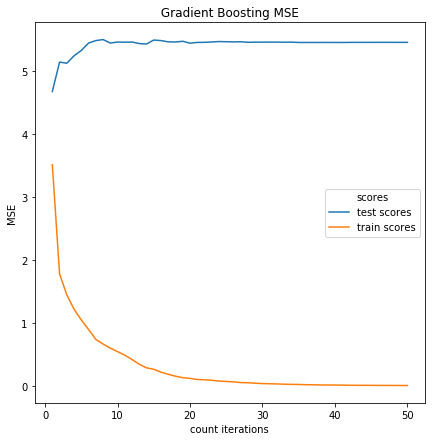

In [0]:
fig, ax = plt.subplots(figsize=(7, 7))
plt.plot(np.arange(1, 51, 1), test_scores, label = 'test scores')
plt.plot(np.arange(1, 51, 1), train_scores, label = 'train scores')
ax.set(xlabel='count iterations', ylabel='MSE', title=' Gradient Boosting MSE ')
ax.legend(title='scores')
plt.show()

7. Попробуйте уменьшать вес перед каждым алгоритмом с каждой
следующей итерацией по формуле 0.9 / (1.0 + i), где i - номер итерации
(от 0 до 49). Какое получилось качество на контрольной выборке?

In [0]:
def gbm_predict(X, base_algorithms, coefficients):
    return sum([coeff * algo.predict(X) for algo, coeff in zip(base_algorithms, coefficients)])

In [0]:
base_algorithms = []
coefficients = []
train_scores = []
test_scores = []
for i in range(50):
    base_algo = DecisionTreeRegressor(max_depth = 5, random_state = 42)
    if i == 0:
        base_algo.fit(x_trn, y_trn)    
    else:
        prediction = gbm_predict(x_trn, base_algorithms, coefficients)
        s = y_trn - prediction
        base_algo.fit(x_trn, s)
    base_algorithms.append(base_algo)
    coefficients.append(0.9/(i + 1.0))
    train_scores.append(mean_squared_error(y_trn, gbm_predict(x_trn, base_algorithms, coefficients)))
    test_scores.append(mean_squared_error(y_val, gbm_predict(x_val, base_algorithms, coefficients)))

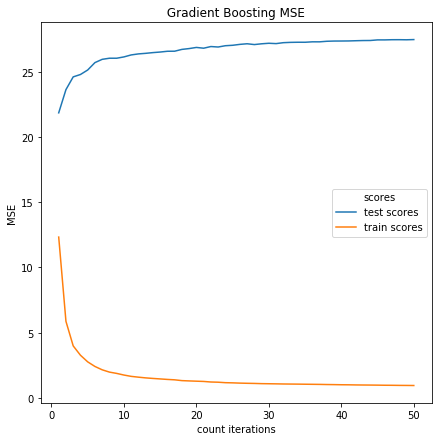

In [0]:
fig, ax = plt.subplots(figsize=(7, 7))
plt.plot(np.arange(1, 51, 1), test_scores, label = 'test scores')
plt.plot(np.arange(1, 51, 1), train_scores, label = 'train scores')
ax.set(xlabel='count iterations', ylabel='MSE', title=' Gradient Boosting MSE ')
ax.legend(title='scores')
plt.show()

8. Исследуйте, переобучается ли градиентный бустинг с ростом числа
итераций, а также с ростом глубины деревьев. Постройте графики.

Рост числа итераций

In [0]:
numbers_trees = np.arange(5, 200, 5)
train_scores = []
test_scores = []

for number_trees in numbers_trees:
    base_algo = GradientBoostingRegressor(n_estimators = number_trees, max_depth=5)
    base_algo.fit(x_trn, y_trn)
    train_scores.append(mean_squared_error(y_trn, base_algo.predict(x_trn)))
    test_scores.append(mean_squared_error(y_val, base_algo.predict(x_val)))

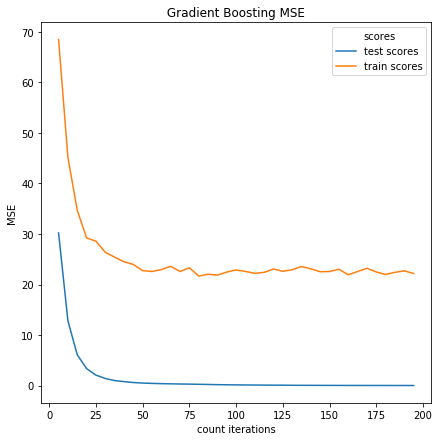

In [0]:
fig, ax = plt.subplots(figsize=(7, 7))
plt.plot(numbers_trees, train_scores, label = 'test scores')
plt.plot(numbers_trees, test_scores, label = 'train scores')
ax.set(xlabel='count iterations', ylabel='MSE', title=' Gradient Boosting MSE ')
ax.legend(title='scores')
plt.show()

Рост глубины деревьев

In [0]:
depth_trees = np.arange(5, 200, 5)
train_scores = []
test_scores = []

for depth_tree in depth_trees:
    base_algo = GradientBoostingRegressor(n_estimators = 50, max_depth=depth_tree)
    base_algo.fit(x_trn, y_trn)
    train_scores.append(mean_squared_error(y_trn, base_algo.predict(x_trn)))
    test_scores.append(mean_squared_error(y_val, base_algo.predict(x_val)))

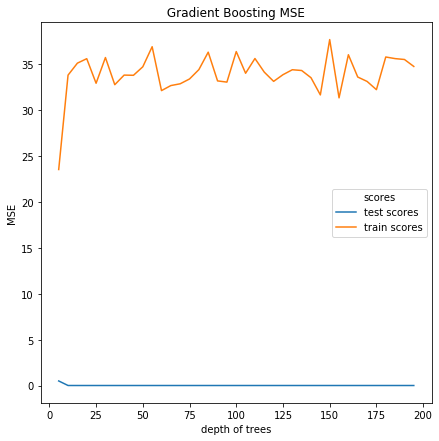

In [0]:
fig, ax = plt.subplots(figsize=(7, 7))
plt.plot(depth_trees, train_scores, label = 'test scores')
plt.plot(depth_trees, test_scores, label = 'train scores')
ax.set(xlabel='depth of trees', ylabel='MSE', title=' Gradient Boosting MSE ')
ax.legend(title='scores')
plt.show()

9.Сравните качество, получаемое с помощью градиентного бустинга с
качеством работы линейной регрессии. Для этого обучите
LinearRegression из sklearn.linear_model (с параметрами по умолчанию)
на обучающей выборке и оцените для прогнозов полученного
алгоритма на тестовой выборке RMSE.

Линейная регрессия

In [0]:
base_algo = LinearRegression()
base_algo.fit(x_trn, y_trn)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
mean_squared_error(y_val, base_algo.predict(x_val)) ** 0.5

15.979430316543748

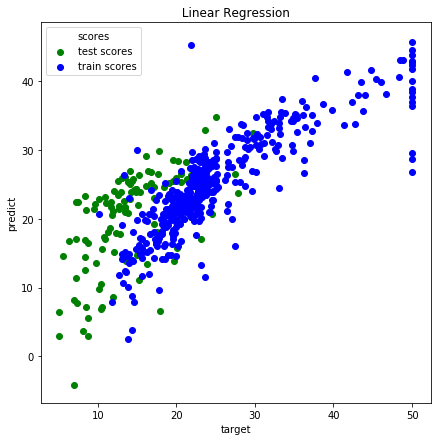

In [0]:
fig, ax = plt.subplots(figsize=(7, 7))
ax.scatter(y_val, base_algo.predict(x_val), c='green', label='test scores')
ax.scatter(y_trn, base_algo.predict(x_trn), c='blue', label='train scores')
ax.set(xlabel='target', ylabel='predict', title=' Linear Regression ')
ax.legend(title='scores')
plt.show()

Градиентный бустинг

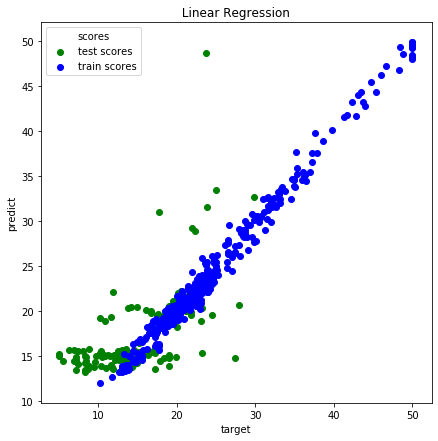

In [0]:
fig, ax = plt.subplots(figsize=(7, 7))
ax.scatter(y_val, gbm_predict(x_val, base_algorithms, coefficients), c='green', label='test scores')
ax.scatter(y_trn, gbm_predict(x_trn, base_algorithms, coefficients), c='blue', label='train scores')
ax.set(xlabel='target', ylabel='predict', title=' Boosting ')
ax.legend(title='scores')
plt.show()